# The Sparks Foundation : Data Science and Business Analytics Internship




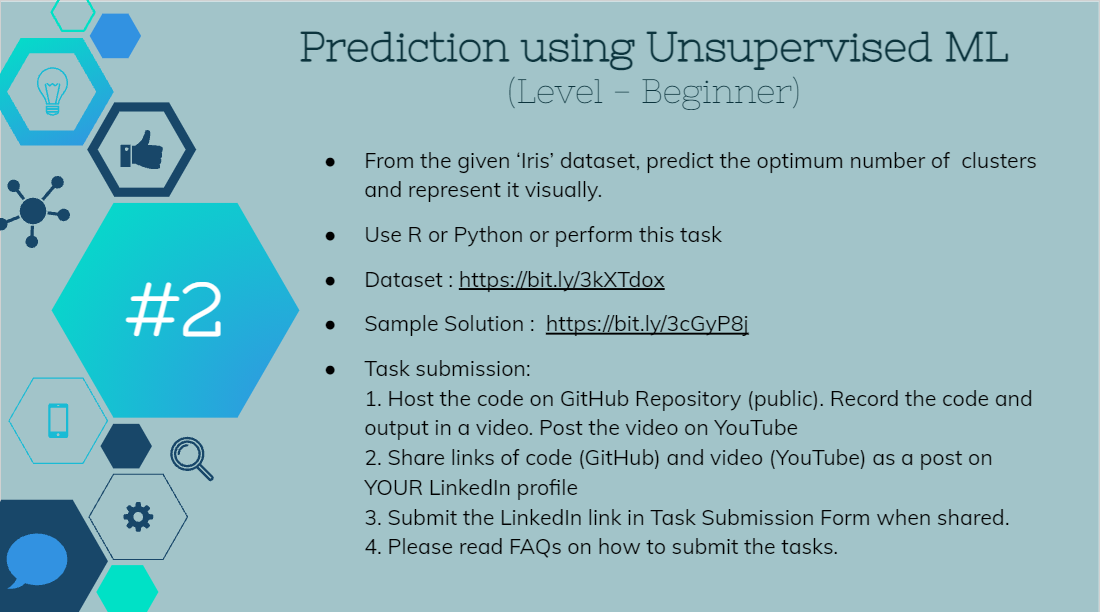

#### Task           :   2
#### Name         :   Joel Bharat Monis
#### IDE             :   Jupyter Notebook
#### Language  :   Python 3
#### Ex              :   Clustering

# 1. Initial action


*   Load the libraries
*   Import the dataset
*   Convert the data



In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
# Import the dataset
from sklearn.datasets import load_iris
iris = load_iris()
input = iris.data
output = iris.target
print("The Iris dataset is as given below : \n")
print(iris.data,"\n\n The target \n", iris.target)

The Iris dataset is as given below : 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data=pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
cluster=pd.DataFrame(iris.target, columns=['cluster'])
df = pd.concat([data, cluster], axis=1)
df

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 2.  EDA and preprocessing


*   Analyse the data
*   Visualise the data 
*   Outlier treatment

In [5]:
## Find out its shape
df.shape

(150, 5)

##### It has 150 rows and 5 columns

In [6]:
## Get basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   cluster       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# Checking for missing values. 
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
cluster         0
dtype: int64

##### There are no missing values

In [9]:
# Checking for Duplicate Values
df.duplicated().sum()

1

##### There is one duplicate value. We will remove this datapoint.

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(149, 5)

##### We confirm that one row has been removed.

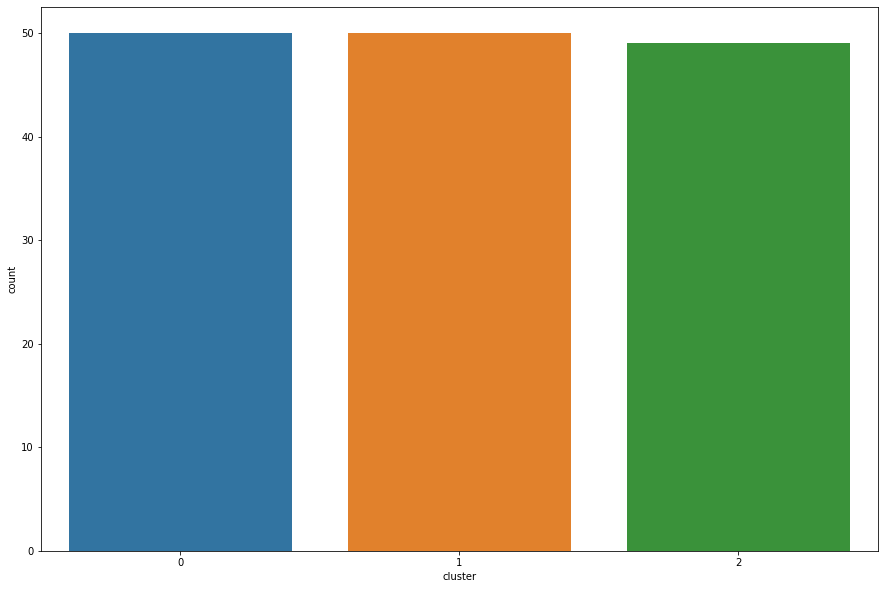

In [11]:
## Lets have a basic look at the data
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df,x='cluster')

<Figure size 1440x720 with 0 Axes>

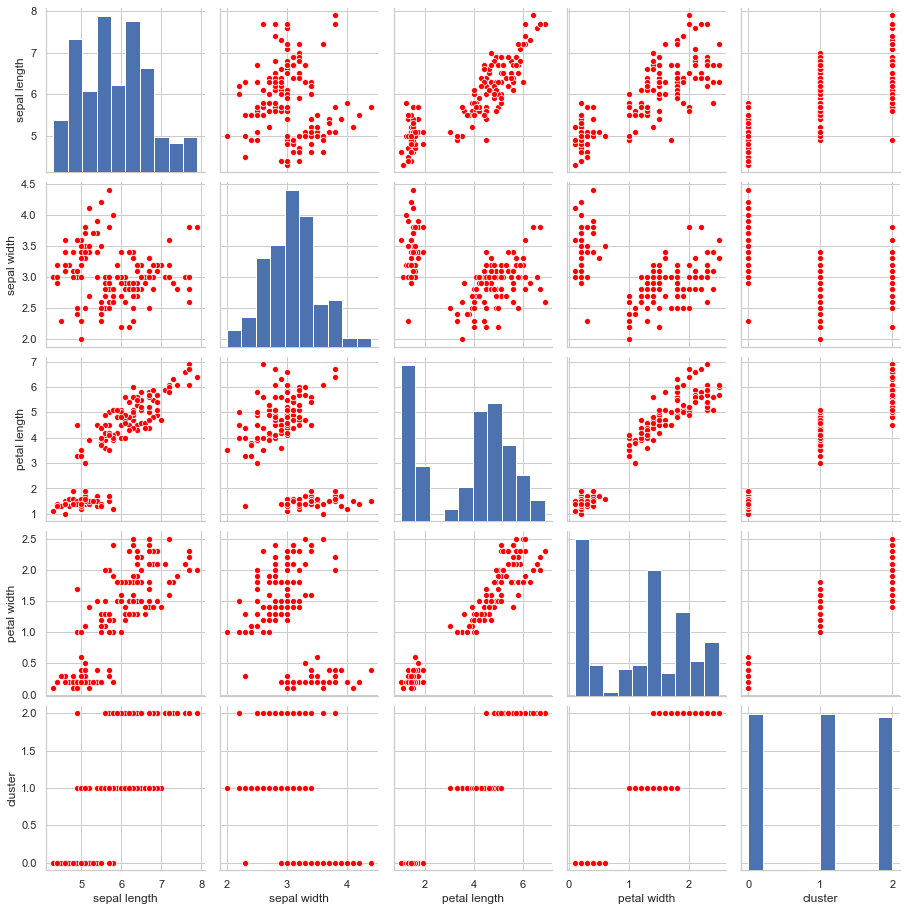

In [12]:
##  Representing the data as pair plots.
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 10))
sns.pairplot(df, plot_kws = {'color' : 'red'});

### Checking for outliers

In [13]:
# to check the number of outliers per column:
def count_outliers(df):
    cols = df.columns
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    print('Count of all outliers:\n')
    print(((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).sum())
    
count_outliers(df)

Count of all outliers:

sepal length    0
sepal width     4
petal length    0
petal width     0
cluster         0
dtype: int64


##### Here we can see that we have 4 outliers in sepal width. 
##### SInce they amount to just a little over 2% I will remove these outliers
##### But first let us see what these values are

In [14]:
Q1 = df['sepal width'].quantile(0.25)
Q3 = df['sepal width'].quantile(0.75)
IQR = Q3 - Q1

df[((df['sepal width'] < (Q1 - 1.5 * IQR)) | (df['sepal width'] > (Q3 + 1.5 * IQR)))]

,sepal length,sepal width,petal length,petal width,cluster
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [15]:
###  Here we drop the outliers and check the shape once again
df=df.drop(df[((df['sepal width'] < (Q1 - 1.5 * IQR)) | (df['sepal width'] > (Q3 + 1.5 * IQR)))].index)
df.shape

(145, 5)

In [16]:
# Crosscheck if the outliers have been dealt with and have not generated any new outliers.
count_outliers(df)

Count of all outliers:

sepal length    0
sepal width     0
petal length    0
petal width     0
cluster         0
dtype: int64


# 3. Finding the optimum number of clusters.

In [17]:
## Now separating out independent variables from the dataframe
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

C:\Users\joelb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


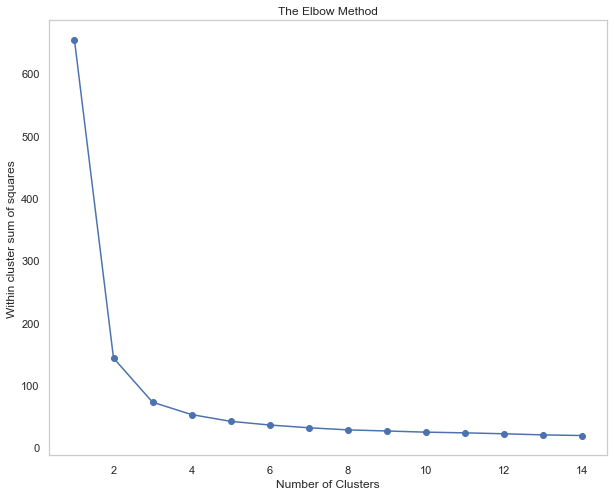

In [18]:
##  Here we construct our ELBOW which will indicate the optimum cluster size. We use "k-means++" initialization method 
##  to avoid the random initialization trap

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the the elbow method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 15), wcss, 'b-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares')
plt.grid()
plt.show()

##### Here the point at which there is no significant decrease in WCSS, is the ideal number of clusters for this dataset. Here, the vale is 3, from where the plot becomes almost linear.

In [19]:
## Creating a classifier with 3 clusters and fitting the points to the clusters to which the points belong
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 12345)
y_pred = kmeans.fit_predict(X)

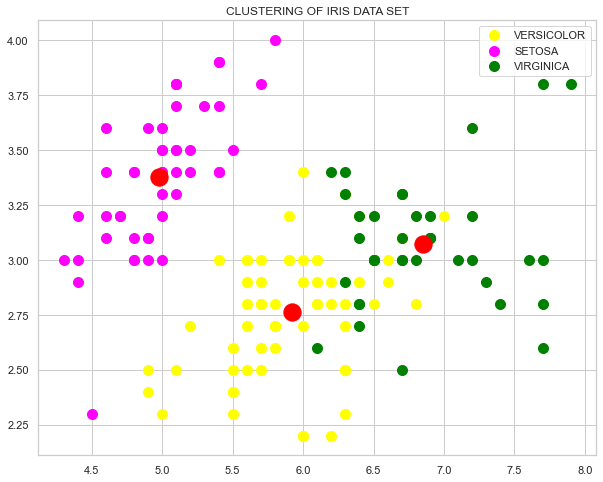

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'yellow')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'magenta')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1] , s = 100, c = 'green')
plt.title('CLUSTERING OF IRIS DATA SET')
plt.legend(["VERSICOLOR", "SETOSA",  "VIRGINICA"])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red', label = 'Centroids')